<a href="https://colab.research.google.com/github/yebiFesseha/Excel-for-Excel-In-MachineLearning/blob/main/LinReg_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd sample_data

/content/sample_data


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("california_housing_train.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
import matplotlib.pyplot as plt

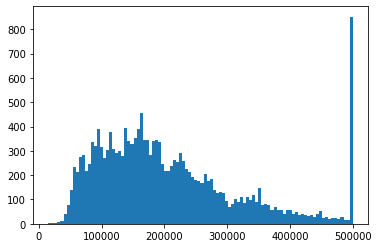

In [ ]:
plt.hist(df['median_house_value'], bins=100)
plt.show()

In [ ]:
!pip install sklearn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X_test = pd.read_csv("california_housing_test.csv")

In [ ]:
X_test.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [ ]:
y_test = X_test.loc[:, 'median_house_value']

In [ ]:
X_test = X_test.drop(['median_house_value'], axis=True)

In [ ]:
y_train = df['median_house_value']
X_train = df.drop(['median_house_value'], axis=True)

In [ ]:
LinReg = LinearRegression()

In [ ]:
LinReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(f" the slopes are = {LinReg.coef_}, and the bias is = {LinReg.intercept_}")

 the slopes are = [-4.31396373e+04 -4.29256731e+04  1.15069493e+03 -8.37825121e+00
  1.17648543e+02 -3.84887721e+01  4.54360026e+01  4.05070684e+04], and the bias is = -3620600.8929739078


In [ ]:
y_pred = LinReg.predict(X_test)
y_pred

array([352812.31112454, 212717.70074518, 272344.69951888, ...,
        88220.58643733, 146374.67481457, 456779.61107787])

In [ ]:
print(f"The R squared value is: {LinReg.score(X_test, y_test)}")

The R squared value is: 0.6195057678312046


In [ ]:
for i in LinReg.coef_:
  print(i)

-43139.63725758569
-42925.67308831368
1150.6949324745615
-8.378251213198382
117.64854284209014
-38.48877209597413
45.43600255225738
40507.06835939748


In [ ]:
my_formatted_list = [ '%.2f' % i for i in LinReg.coef_ ]
str1 = 'x + '.join(str(e) for e in my_formatted_list)
print("Formula is:\n y = ", str1, ' + ', str(LinReg.intercept_) )

Formula is:
 y =  -43139.64x + -42925.67x + 1150.69x + -8.38x + 117.65x + -38.49x + 45.44x + 40507.07  +  -3620600.8929739078


In [ ]:
for e in [round(i,2) for i in LinReg.coef_]:
  print(f"{e}x + {round(LinReg.intercept_,2)}")

-43139.64x + -3620600.89
-42925.67x + -3620600.89
1150.69x + -3620600.89
-8.38x + -3620600.89
117.65x + -3620600.89
-38.49x + -3620600.89
45.44x + -3620600.89
40507.07x + -3620600.89


### The above can be rewrittesn as


In [ ]:
[(f"{e}x + {round(LinReg.intercept_,2)}") for e in [round(i,2) for i in LinReg.coef_]]

['-43139.64x + -3620600.89',
 '-42925.67x + -3620600.89',
 '1150.69x + -3620600.89',
 '-8.38x + -3620600.89',
 '117.65x + -3620600.89',
 '-38.49x + -3620600.89',
 '45.44x + -3620600.89',
 '40507.07x + -3620600.89']